# Apply PCA and Clustering to Wholesale Customer Data¶


In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Notebooks/Datasets/Wholesale_customers_data.csv')
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
#Storing channel column in a different variable, then dropping it along with Region from the dataframe
channel = df['Channel']
df = df.drop(columns=['Channel', 'Region'])

In [4]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [6]:
# PCA computation by sklearn
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.65099857 1.70646229]
[0.44082893 0.283764  ]
[0.44082893 0.72459292]


## Apply the elbow method to K-Means

In [7]:
from scipy.spatial import distance

distortions = []
K = range(1, 15)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(df_scaled, km.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

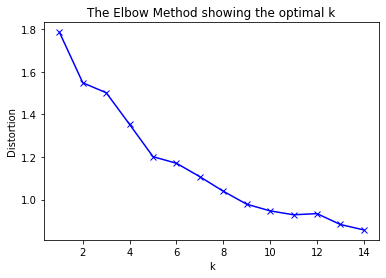

In [8]:

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering without PCA

In [9]:
km = KMeans(n_clusters=2)
km.fit(df_scaled)

print(km.cluster_centers_)

[[-0.03320235  1.96131927  2.0840333   0.26668431  1.99206781  0.70143773]
 [ 0.00406559 -0.24016154 -0.25518775 -0.03265522 -0.24392667 -0.08589033]]


In [10]:
#Getting prediction results from KMeans
y_pred = km.predict(df_scaled) + 1 #Adding 1 because the channel column is built on 1s and 2s, not 0s and 1s

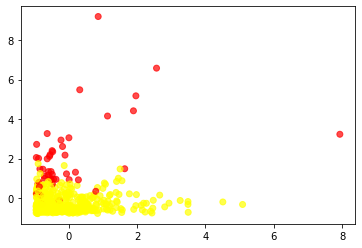

In [11]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_pred, cmap='autumn', alpha=0.7)

In [15]:
#Getting the metrics from our channel and predicted values
def confusion(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    
    return [accuracy, precision, recall, f1score]

In [16]:
y_true = channel
metrics = confusion(y_true, y_pred)
print(f'Accuracy: {metrics[0]}')
print(f'Precision: {metrics[1]}')
print(f'Recall: {metrics[2]}')
print(f'F1 Score: {metrics[3]}')

Accuracy: 0.23636363636363636
Precision: 0.10416666666666667
Recall: 0.016778523489932886
F1 Score: 0.028901734104046242


In [17]:
confusion_matrix(y_true, y_pred)

array([[  5, 293],
       [ 43,  99]])

## Clustering with PCA

In [18]:
#Applying Principle Component Analysis
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

km_pca = KMeans(n_clusters=2)
km_pca.fit(df_pca)
print(km.cluster_centers_)

[[-0.03320235  1.96131927  2.0840333   0.26668431  1.99206781  0.70143773]
 [ 0.00406559 -0.24016154 -0.25518775 -0.03265522 -0.24392667 -0.08589033]]


In [28]:
#Getting prediction results from KMeans using PCA data
y_pred_pca = km_pca.predict(df_pca) + 1 #Adding 1 because the channel column is built on 1s and 2s, not 0s and 1s

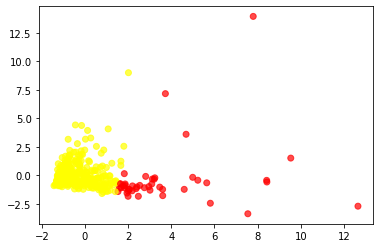

In [29]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred_pca, cmap='autumn', alpha=0.7)

In [30]:
metrics = confusion(y_true, y_pred_pca)
print(f'Accuracy: {metrics[0]}')
print(f'Precision: {metrics[1]}')
print(f'Recall: {metrics[2]}')
print(f'F1 Score: {metrics[3]}')

Accuracy: 0.22954545454545455
Precision: 0.044444444444444446
Recall: 0.006711409395973154
F1 Score: 0.011661807580174927


# Conclusion

When we applied PCA to the data, our accuracy and the rest of the results fell. We can conclude that PCA did not benefit analyzing the dataset.